# Diffusion

:::{admonition} **What you will learn**

- Microscopic model of diffusion and its link to ranom walk
- Mean square displacement as measure of diffusive motion
- Mesoscopic model of diffuion and how to simulate Brownian motion
- Macroscopic model of diffusion and Fick's law

:::


:::{figure-md} markdown-fig  

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/DiffusionMicroMacro.gif" alt="DiffusionMicroMacro.gif" style="width:10%">

Diffusion at Micro, Meso and Macro scales.

:::  


### Microscopic Aspects of Diffusion: Random Walk

- Microscopic theories of diffusion are built on **random walk models**, which lead to the derivation of the **diffusion equation**.
- We begin by considering an **unbiased random walk** with $ n $ steps, all originating from $ r_0 = 0 $.
- Repeating this process $N$ times allows us to compute **ensemble-averaged** quantities. For instance, the average single-step displacement,  confirms that the random walk is unbiased.

  $$
  \langle r_i \rangle = 0,
  $$

- The total displacement after $ n $ steps is given by:

  $$
  R_n = \sum^{n}_{i=0} r_i
  $$

- Taking the ensemble average:

  $$
  \langle R_n \rangle = \sum^{n}_{i=0} \langle r_i \rangle = 0.
  $$

- A more insightful measure is the **mean square displacement (MSD)**, which quantifies fluctuations of the random walker relative to the origin as a function of time.


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML



def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = 0.5
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk


def update_lines(num, walks, lines):
    for line, walk in zip(lines, walks):
        line.set_data_3d(walk[:num, :].T)
    return lines


# Data: 40 random walks as (num_steps, 3) arrays
num_steps = 30
walks = [random_walk(num_steps) for index in range(40)]

# Attaching 3D axis to the figure
fig = plt.figure()
ax = fig.add_subplot(projection="3d")

# Create lines initially without data
lines = [ax.plot([], [], [])[0] for _ in walks]

# Setting the Axes properties
ax.set(xlim3d=(0, 1), xlabel='X')
ax.set(ylim3d=(0, 1), ylabel='Y')
ax.set(zlim3d=(0, 1), zlabel='Z')

# Creating the Animation object
ani = animation.FuncAnimation(
    fig, update_lines, num_steps, fargs=(walks, lines), interval=100)

plt.close()
HTML(ani.to_jshtml())

#### Mean Square Displacement and Diffusion Coefficient

- Expressing the number of steps in terms of time increments $ n = \frac{t}{\delta t} $, we compute the **ensemble average** over $ N $ random walkers:

$$
\langle R^2_n\rangle = \sum^{n}_{i=1} \sum^{n}_{j=1} \langle r_i r_j \rangle = \sum_i \langle r^2_i \rangle
$$

- Where **the cross terms vanished** becasue of independence of random variables $\langle r_i r_j \rangle = \langle r_i \rangle \langle r_j \rangle=0$.
- Since all dimensions are equal we can write for e.g, 3D random walker $\langle r^2\rangle= 3\langle x^2\rangle$ or more generally for $d$ dimensions

$$
\langle R^2_n\rangle = \sum^{n}_{i=1} d \cdot \langle l^2_i \rangle = d \cdot n \cdot  \langle l^2 \rangle
$$

$$
\langle R^2_n\rangle = d \cdot \frac{t}{\delta t}  \cdot \langle l^2 \rangle
$$

Grouping constants together, we define the **diffusion coefficient** $D$, which characterizes the spreading of a particle:

$$
D = \frac{\langle \delta x^2 \rangle}{2\delta t}
$$


:::{admonition} **Mean Square Displacement (MSD)**
:class: important

$$
\langle R^2 (t) \rangle = 2d D t
$$

- Rimension $d=1, 2, 3 ...$
- Time $t$
- Displacement from the origin $R$

:::

- Using CLT we can also predict that after large number of steps displacements with respect to origin will be distributed following Gaussian with MSD controlling width of the gaussian

$$
P(x, t) \approx \frac{1}{\sqrt{4 \pi D t }} \exp\left(-\frac{x^2}{4Dt }\right)
$$


In [ ]:
# Re-run the full script to ensure all variables are defined correctly

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Parameters
num_steps = 100  # Number of steps
num_walks = 40   # Number of random walks
max_step = 0.05  # Maximum step size
dt = 1  # Time step

# Function to generate 3D random walk
def random_walk(num_steps, max_step=0.05):
    """Return a 3D random walk as (num_steps, 3) array."""
    start_pos = np.zeros(3)
    steps = np.random.uniform(-max_step, max_step, size=(num_steps, 3))
    walk = start_pos + np.cumsum(steps, axis=0)
    return walk

# Function to compute MSD
def mean_square_displacement(walks):
    """Compute MSD over all walks."""
    squared_displacements = [np.sum(walk**2, axis=1) for walk in walks]
    return np.mean(squared_displacements, axis=0)

# Generate random walks
walks = [random_walk(num_steps, max_step) for _ in range(num_walks)]

# Select a single trajectory to visualize
single_walk = walks[0]

# Compute MSD
msd = mean_square_displacement(walks)

# Estimate diffusion coefficient from MSD (slope method)
time = np.arange(num_steps)
slope, intercept, _, _, _ = linregress(time, msd)
D_fit = slope / 6  # In 3D, MSD = 6Dt


# Estimate diffusion coefficient from step fluctuations
step_fluctuations = np.array([np.mean(np.sum(np.diff(walk, axis=0)**2, axis=1)) for walk in walks])
D_step = np.mean(step_fluctuations) / (6 * dt)
print('estimate from step fluctuations', D_step)

# Create figure for single trajectory and MSD
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a single trajectory in 3D
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot(single_walk[:, 0], single_walk[:, 1], single_walk[:, 2], label="Single Trajectory", color='b', alpha=0.7)
ax1.scatter(single_walk[0, 0], single_walk[0, 1], single_walk[0, 2], color='g', marker='o', label="Start")
ax1.scatter(single_walk[-1, 0], single_walk[-1, 1], single_walk[-1, 2], color='r', marker='o', label="End")
ax1.set_title("3D Random Walk Trajectory")
ax1.set_xlabel("X Position")
ax1.set_ylabel("Y Position")
ax1.set_zlabel("Z Position")
ax1.legend()

# Plot MSD and diffusion coefficient estimations
ax2 = axes[1]
ax2.plot(time, msd, label="MSD (Simulated)", color='b')
ax2.plot(time, slope * time + intercept, '--', label=f"Linear Fit (D={D_fit:.4f})", color='r')

ax2.set_xlabel("Time step")
ax2.set_ylabel("Mean Square Displacement (MSD)")
ax2.set_title("MSD & Diffusion Estimation")
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()


:::{admonition} **Pause to reflect: from random walk to diffusion equation**
:class: note, dropdown 

- Think what probability distribution would random walk model fo diffusion predict.
- How can we derive an equation of motion that governs $p(x, t)$.
- Take a molecule with equal jump probabilities 1/2. How to relate probability of molecule being at $x$, at and advanced  time $t+\delta t$  to probabilities of being in nearby locations $x\pm \Delta x$ at previous step t. 
- Ttry forming derivative with respect to time by taking difference $p(x, t+\delta t)-p(x,t)$ that can lead us to equation of motion
:::

### Chapman-Kolmogorov and Transition probabilities

- **Key idea of time evolving probabilities:** The total probability of going from $y_1$ to $y_3$ is obtained by considering every possible intermediate state $y_2$ and adding up the probabilities of taking those two consecutive transitions

:::{figure-md} markdown-fig  

<img src="./figs/CK-visual.png" style="width:50%">

Graphical representation of the Chapman–Kolmogorov equa- tion which relates the transition probability $P(y_3, t_3 |y_1, t_1 )$ to go from the start position $y_1$ at $t_1$ to the end position $y_3$ at $t_3$ to the transition probabilities to go from the start position to any position at $t_2$ and then from there to the end position.
:::  

- The Chapman-Kolmogorov (CK) relation is simply a formal restatement of basic probability rules (product rule and sum rule), tailored for stochastic processes evolving in time. 


:::{admonition} **Chapman-Kolmogorov and transition probabilities**
:class: important


$$
P(y_3, t_3 | y_1, t_1) = \int P(y_3, t_3 | y_2, t_2 ) P(y_2, t_2 | y_1, t_1 ) \, dy_2
$$

- $P(y_2, t_2 | y_1, t_1 )$: Probability of transitioning from an **initial state** to **intermediate state.**
- $P(y_2, t_2 | y_1, t_1 )$: Probability of transitioning from an **intermediate state** to **final state.** 
- $P(y_3, t_3 | y_1, t_1 )$: Probability of transitioning from an **initial state**  to **final state.**  
:::

- A situation of great interest to us is to start with some initial distirbution of molecules described by  $P(x',t)$ and connect it a distribution $p(x, t+\delta t)$.
- Connecting two probability distirbutions at different times is done via  $p(x, t+\delta t| x', t)$ which can be interpreted as a **transition probability**

$$
P(x, t+\delta t) = \int P(x, t+\delta t | x', t ) \cdot P(x', t ) \, dx'
$$

#### Diffusion Equation emerges from random walk

- Probability for particle to land at position $x$ from previous step can happen either from point to the left $x-\delta x$ or from point to the right $x+\delta x$. 
- Hence CK relation in this case becomes simple sum of probabnilities of being in those locations multiplied by $1/2$ the transition probability to make the respective jumps 

$$
P(x, t+\delta t) = \frac{1}{2} P(x - \delta x, t ) + \frac{1}{2} P(x + \delta x, t).
$$

- We can also arrive at this same expression by pluging  delta function representation of random walk into the integral expression of CK expression (see the delta function primer below).

- These types of expressions which relate probability of an advanced step to previous steps or previous time increments are referred to as **recurrence** relations. 


- Expanding probabilities $ P(x\pm \delta x, t) $ using a **Taylor series** in small $ \delta x $ we get:

$$
P(x \pm \delta x, t ) \approx P(x, t ) \pm \delta x \frac{\partial P}{\partial x} + \frac{(\delta x)^2}{2} \frac{\partial^2 P}{\partial x^2}.
$$

- Substituting into the recurrence relation and cancelling first derivative terms with oposite signs we arrive at

$$
P(x, t+\delta t) = P(x, t) + \frac{(\delta x)^2}{2} \frac{\partial^2 P}{\partial x^2}.
$$

- Rearranging to form time derivative:

$$
\frac{P(x, t+\delta t) - P(x, t)}{\delta t} = \frac{(\delta x)^2}{2 \delta t} \frac{\partial^2 P}{\partial x^2}.
$$

- Taking the limit $ \delta t \to 0 $ and defining the **diffusion coefficient** $ D = \frac{(\delta x)^2}{2 \delta t} $, we obtain the **diffusion equation**

:::{admonition} **Diffution Equation**
:class: important

$$ \frac{\partial P(x,t)}{\partial t} = D \frac{\partial^2 P(x,t)}{\partial x^2} $$

:::

- Probability at $x$ changes faster (time derivative) if there is a larger imabalance of probability around point x 
(second derivative of $x$). 

- One particula solution for the equation that you can verify by plugging into the equation above is once again gaussian with time dependent variance that describes probability distribution of brownian particles over space and time

$$
P(x, t) = \frac{1}{\sqrt{4 \pi D t }} \exp\left(-\frac{x^2}{4Dt }\right)
$$

:::{admonition} **Exercise: Use CK to compute how gaussian probability evolves after two steps** 
:class: info, dropdown

To demonstrate the Chapman-Kolmogorov equation analytically, we start with the transition probability for a Gaussian diffusion process:

$$
P(x, t + \Delta t | x_0, t) = \frac{1}{\sqrt{4 \pi D \Delta t}} \exp\left(-\frac{(x - x_0)^2}{4 D \Delta t}\right).
$$

According to the Chapman-Kolmogorov equation, the two-step transition probability should satisfy:

$$
P(x, t + 2\Delta t | x_0, t) = \int_{-\infty}^{\infty} P(x, t + 2\Delta t | x', t + \Delta t) P(x', t + \Delta t | x_0, t) \, dx'.
$$

- Substituting the Gaussian transition probability into the integral,

$$
P(x, t + 2\Delta t | x_0, t) = \int_{-\infty}^{\infty} \frac{1}{\sqrt{4 \pi D \Delta t}} \exp\left(-\frac{(x - x')^2}{4 D \Delta t}\right) \times \frac{1}{\sqrt{4 \pi D \Delta t}} \exp\left(-\frac{(x' - x_0)^2}{4 D \Delta t}\right) dx'.
$$

- Opening up exponents and carrying out integration we arrive at another Guassian but with added varianes! But this is a result we already established with CLT according to which  $\sigma^2 = \sigma^2_1+\sigma^2_2$

$$
P(x, t + 2\Delta t | x_0, t) = \frac{1}{\sqrt{8 \pi D \Delta t}} \exp\left(-\frac{(x - x_0)^2}{8 D \Delta t}\right).
$$

- This result matches the direct solution for the transition probability at time  $t + 2\Delta t$, verifying that the Chapman-Kolmogorov equation holds.

:::


:::{admonition} **Delta Functions: A Primer for statistical mechanics**  
:class: tip, dropdown

**1. Definition and Intuition** 

- The delta function is **zero everywhere except at $x = 0$** and **integrates to one**:  

$$
\delta(x) = 0 \quad \text{for } x \neq 0, \quad \text{and} \quad \int_{-\infty}^{\infty} \delta(x) \, dx = 1.
$$

- It can be viewed as the limit of a **narrow Gaussian**:  

$$
\delta(x) = \lim_{\sigma \to 0} \frac{1}{\sqrt{2\pi}\sigma} e^{-\frac{x^2}{2\sigma^2}}.
$$


**2. Sifting (Sampling) Property**  

- The most important property for statistical mechanics is the **sifting property**, which extracts the value of a function at a point:  

$$
\int_{-\infty}^{\infty} f(x) \delta(x - x_0) \, dx = f(x_0).
$$

- This is useful for representing probability distributions where all probability is concentrated at a single state or energy level.  


**3. Delta Function in Fourier Space**

- In statistical mechanics, the delta function appears frequently in **Fourier transforms**, which are used to compute **correlation functions** and analyze **spectral densities**. 

- The **Fourier representation** of the delta function is:  

$$
\delta(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{ikx} \, dk.
$$


**Delta Functions Represent Discrete Outcomes**  

- In probability theory, the delta function is a natural tool to represent **discrete probabilities in continuous space**, because it indicates a **probability mass at a single point**.  

- For instnace if a particle can only be at position $x_0$ at time $t$  with probability 1, the probability distribution is:

$$
P(x, t) = \delta(x - x_0).
$$

$$
\int P(x,t)dx = \int \delta(x - x_0) dx = 1
$$


 **Probabilities for Discrete Random Processes**  

- Since the possible outcomes are discrete, the continuous probability distribution at each possible outcome is best represented by a **sum of delta functions**, each weighted by its probability.  

- For example for every coin with values $\pm1$ toss we can write discrete probability as sum of two deltas that represent two equal bars on histogram. 

$$
P(x) = \frac{1}{2}\delta(x+1)+\frac{1}{2}\delta(x-1)
$$

$$
\int P(x)dx  = \frac{1}{2}+\frac{1}{2}=1
$$

- For each die roll there will be six delta functions weighted by $1/6$, etc. 


 **Random Walk example**  

- In a **1D simple symmetric random walk**, a walker moves either **one step $-l$ to the left** or **one step to the right $+l$** with **equal probability $ \frac{1}{2} $**. At each time step, there are exactly two possible outcomes from position $ x' $:  

- With probability $ \frac{1}{2} $, move to $ x_0 + l $.  
- With probability $ \frac{1}{2} $, move to $ x_0 - l $.  

$$
P(x, t + \delta t | x_0, t) = \frac{1}{2} \delta(x - x' - l) + \frac{1}{2} \delta(x - x' + l).
$$

- Plugging this transition pribability into Chapman-Kolmogorov relation we get a **recurrence relation** relating probabilities at future times to probabilities at past times. 

$$
P(x, t + \delta t) = \int_{-\infty}^{\infty} P(x, t + \delta t | x', t) P(x', t) \, dx'
$$

$$
P(x, t + \delta t) = \frac{1}{2} P(x-l, t) + \frac{1}{2} P(x+l, t)
$$

- We once again arrive at the recurseion relation connecting probability of advanced time-step to probabilities from previous time-step

:::

:::{admonition} **Generating Functions and the Emergence of the Gaussian Distribution**  
:class: tip, dropdown

- Here we consider a **generalization of a random walk with variable steps** where steps $X_i$ are themleves random variables described by a probability $P(x)dx$ of finding random walker at position x. 
- After N steps we want to know probability that sum of the steps is equal to some displacement $R$.

$$R = X_1 +X_2+... X_N $$

To formally derive the **Gaussian nature** of the probability distribution for the random walk, we start with the **definition of the probability distribution** of the sum of independent steps:

$$
P_n(R) = \int dx_1 dx_2 \dots dx_n \, P(x_1) P(x_2) \dots P(x_n) \, \delta\left(R - \sum_{i=1}^{n} x_i \right)
$$

Here, $ P(x) $ represents the probability density function (PDF) for a single step. The presence of the **Dirac delta function** enforces the sum constraint.

We introduce the **Fourier representation** of the delta function:

$$
\delta(R - \sum_i x_i) = \int \frac{dk}{2\pi} e^{-ik(R - \sum_i x_i)}
$$

Substituting into $ P_n(R) $, we obtain:

$$
P_n(R) = \int \frac{dk}{2\pi} e^{-ikR} \left[ \int dx \, P(x) e^{ikx} \right]^n
$$

The term in brackets is the **Generating function** (Fourier transform of the step distribution):

$$
G(k) = \int dx \, P(x) e^{ikx}
$$

Since each step is independent, the generating function of the sum factorizes:

$$
P_n(R) = \int \frac{dk}{2\pi} e^{-ikR} \left[G(k)\right]^n
$$

For small steps, we expand $ G(k) $ in a Taylor series:

$$
G(k) = 1 - \frac{1}{2} k^2 \langle x^2 \rangle + \mathcal{O}(k^4)
$$

Thus, for large $ n $, we approximate:

$$
\left[G(k)\right]^n \approx e^{ -\frac{1}{2} n k^2 \langle x^2 \rangle }
$$

Taking the inverse Fourier transform, we obtain the **Gaussian probability density function (PDF)**:

$$
P_n(R) = \frac{1}{\sqrt{2\pi n \langle x^2 \rangle}} e^{ -\frac{R^2}{2n \langle x^2 \rangle} }
$$

Since $ n = \frac{t}{\delta t} $, this gives the **diffusion propagator**:

$$
P(R, t) = \frac{1}{\sqrt{4\pi D t}} e^{-R^2 / (4Dt)}
$$

This result shows that the **probability of finding the particle at position $ R $ at time $ t $ follows a Gaussian distribution**, which is the solution to the **diffusion equation**:

$$
\frac{\partial P}{\partial t} = D \nabla^2 P
$$

Thus, diffusion emerges **naturally from the sum of many independent random steps**, justifying the **Gaussian approximation** via the central limit theorem.

:::

### Mesoscopic aspects of Diffusion


:::{figure-md} markdown-fig  

<img src="./figs/history_diff.png" alt="DiffusionMicroMacro.gif" style="width:35%">

Fick's laws of diffusion, first proposed by Adolf Fick in 1855, were based largely on experimental observations. These laws describe diffusion in a manner analogous to Fourier's heat equation (1822), which models heat transport. In 1827, Robert Brown observed the random motion of microscopic particles suspended in a fluid, later termed Brownian motion. Building on this, Albert Einstein developed a microscopic theory of diffusion in 1905, providing a theoretical foundation for Brownian motion. His work was instrumental in convincing scientists of the particulate nature of matter, a key step toward validating atomic theory.

:::  

- Ranom walk provides a microscopic model of self-diffusion of molecules. Here we consider coarser diffusion on a coarser or mesocopic scale where a hevier solute particle moves erratically as a result of collisions with lighter solvent molecules. This setup is called **Brownian motion** 
- Einstein's 1905 derivation of the diffusion equation provides a fundamental description of Brownian motion. This derivation bridges statistical mechanics and macroscopic diffusion laws.

:::{figure-md} markdown-fig  

<img src="figs/dp_diffusion.png" alt="Brownian Motion Animation" style="width:30%">  

Visual explanation of computing probability of solute being at position and time $(x, t+\Delta t)$ given that it started some $x-\Delta x$ position away where $\Delta x$ is variable and in fact gaussian distributed due to numerous collisions with solvent molecules which make such summed jump a gaussian random variable per CLT 

:::  

- Let $P(x,t)$ be the probability density of finding the solute particle at position $x$ at time $t$.

- Probability of molecule at position $x-\Delta x$ making a jump $\Delta x$ in a time interval $\Delta t$ is given by transition probability $\Phi(\Delta x) = P(x, t+\Delta t | x - \Delta x, t)$. 
- Using the CK relation, the probability of finding the particle at $x$  at time $t+\Delta t$ is given by:

$$ P(x,t+\Delta t) = \int_{-\infty}^{\infty} \Phi(\Delta x ) P(x-\Delta x, t) d(\Delta x)$$

- For small displacements, we expand $P(x-\Delta x, t)$ in a Taylor series:

$$ P(x-\Delta x, t) \approx P(x,t) - \Delta x \frac{\partial P}{\partial x} + \frac{(\Delta x)^2}{2} \frac{\partial^2 P}{\partial x^2}$$

- Plugging this expansion into integral equation to second order and assuming symmetry of transition probability we get:

$$ \int_{-\infty}^{\infty} \Phi(\Delta x) \Delta x d(\Delta x) = 0, $$

- Taking difference of probabilities and dividing by time-step we get

$$ \frac{P(x,t+\Delta t) - P(x,t )}{\Delta t}= D \frac{\partial^2 P}{\partial x^2}$$

- Taking the limit $\Delta t \to 0$, we recover the **diffusion equation** 

$$ \frac{\partial P(x,t)}{\partial t} = D \frac{\partial^2 P(x,t)}{\partial x^2} $$

- Where we now have the diffusion defined as **second moment of transition probability** in the limit of $\Delta t\rightarrow 0$

$$ D = \frac{1}{2\Delta t}\int_{-\infty}^{\infty} \Phi(\Delta x) (\Delta x)^2 d(\Delta x)$$


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# Define the spatial grid
x = np.linspace(-5, 5, 200)

# Define initial Gaussian distribution parameters
sigma_initial = 0.3
D = 0.1  # Diffusion coefficient
t_max = 5  # Maximum time
num_frames = 10  # Number of plotted time steps

# Function to compute the Gaussian profile at a given time
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

# Compute time steps
times = np.linspace(0, t_max, num_frames)
sigma_values = np.sqrt(sigma_initial**2 + 2 * D * times)

# Generate colors using a sequential colormap
colors = cm.Blues(np.linspace(0.3, 1, num_frames))

# Plot 1D Gaussian evolution over time
plt.figure(figsize=(8, 6))
for i, sigma in enumerate(sigma_values):
    plt.plot(x, gaussian(x, sigma), color=colors[i], label=f'$t={times[i]:.1f}$')

# Add arrows indicating the broadening of the distribution
plt.arrow(0, 1.2, 0.5, 0, head_width=0.05, head_length=0.2, fc='black', ec='black')
plt.arrow(0, 1.2, -0.5, 0, head_width=0.05, head_length=0.2, fc='black', ec='black')

# Labels and formatting
plt.xlabel("Position $x$")
plt.ylabel("Density $\\rho(x,t)$")
plt.title("Time Evolution of Gaussian Due to Diffusion")
plt.legend()
plt.grid(True)
plt.show()


# Define the spatial grid for 3D visualization
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Define initial Gaussian distribution parameters
sigma_initial = 0.3
D = 0.1  # Diffusion coefficient
t_max = 5  # Maximum time
num_frames = 3  # Number of time snapshots

# Function to compute the 2D Gaussian profile at a given time
def gaussian_2d(X, Y, sigma):
    return np.exp(-(X**2 + Y**2) / (2 * sigma**2)) / (2 * np.pi * sigma**2)

# Compute time steps
times = np.linspace(0, t_max, num_frames)
sigma_values = np.sqrt(sigma_initial**2 + 2 * D * times)

# Create 3D plots for different time steps
fig = plt.figure(figsize=(12, 4))

for i, sigma in enumerate(sigma_values):
    ax = fig.add_subplot(1, num_frames, i + 1, projection='3d')
    Z = gaussian_2d(X, Y, sigma)
    ax.plot_surface(X, Y, Z, cmap='Blues', edgecolor='none', alpha=0.8)
    
    ax.set_title(f'$t={times[i]:.1f}$')
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    ax.set_zlabel("$\\rho(x,y,t)$")
    ax.set_zlim(0, 0.6)

plt.suptitle("3D Visualization of Gaussian Diffusion")
plt.show()

:::{admonition} **Compute second derivative numerically**
:class: note, dropdown 

- Write down the first and second derivatives of a function p(x) as limit of differences.  
- Take a 1D function $p(x)$ in numpy, plot then compute first and then second derivatives at different points
:::

#### Simulating Brownian Motion  

:::{figure-md} markdown-fig  

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Brownian_motion_large.gif" alt="Brownian Motion Animation" style="width:10%">  

Animation of Brownian Motion 

:::  

- **Brownian motion** describes the random movement of a particle suspended in a solvent composed of much smaller molecules. This motion arises from **a large number of independent random collisions** with solvent molecules. 
- We have worked out a mesoscopic theory of diffusion and obtained probability distribution as a function of time $P(x, t)$ for solute moolecules in dilute solution. 
- Here we switch perspective to random variables, and make use of CLT to approximate the displacement of the particle over a small time step $dt$ as a normally distributed random variable with variance $\sigma^2 = 2Dt$

$$
x(t+dt) - x(t) \sim \mathcal{N}(0, \sqrt{2D dt})
$$


- Using transformation $N(\mu, \sigma^2) = \mu + \sigma N(0,1)$ to normal random variable we arrive at simple recipie for simulating brownian motion.

:::{admonition} **Simulating Brownian Motion with Normal Random Variables**
:class: important

$$
x(t+dt) = x(t) + \sqrt{2D dt} \cdot N(0,1)
$$

- $dt$ simulation time step
- $D$ Diffusion coeficient
:::

- This formulation highlights the connection between Brownian motion and Gaussian distributions. Specifically, we rewrite the update step using the general form of a normally distributed random variable:

- In the future we will meet Langevin equation which is also a mesoscopic model, but it sits at a finer level of description compared to the standard Brownian motion model. In langevin description we will explicitly model the forces and momentum relaxation of brownian particle

In [ ]:
# Re-run the full script to ensure all variables are defined correctly

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_steps = 1000  # Number of steps
num_walks = 10000  # Number of random walks for probability distribution
dt = 1  # Time step
D = 1  # Diffusion coefficient

# Corrected step size for Brownian motion
step_size = np.sqrt(2 * D * dt)

# Storage for probability distributions at selected time steps
time_steps = [10, 100, 500, 1000]  # Chosen time steps for histograms
positions = np.zeros((num_walks, num_steps))

# Simulate 1D Brownian motion
for i in range(num_walks):
    steps = np.random.normal(loc=0, scale=step_size, size=num_steps)
    positions[i, :] = np.cumsum(steps)  # Cumulative sum for position

# Compute Mean Squared Displacement (MSD)
msd = np.mean(positions**2, axis=0)
expected_msd = 2 * D * np.arange(num_steps) * dt  # Theoretical MSD

# Create a single plot for probability distributions at different times
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(7,4))

# Plot probability distributions at different times
for t in time_steps:
    hist_data, bin_edges = np.histogram(positions[:, t-1], bins=50, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    ax1.plot(bin_centers, hist_data, label=f"Simulated (t={t})", alpha=0.7)

    # Theoretical Gaussian distribution
    x_vals = np.linspace(-4*np.sqrt(2*D*t), 4*np.sqrt(2*D*t), 100)
    theoretical_dist = (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-x_vals**2 / (4 * D * t))
    ax1.plot(x_vals, theoretical_dist, '--', label=f"Theoretical (t={t})")

ax1.set_xlabel("$x$")
ax1.set_ylabel("$P(x,t)$")
ax1.legend()
ax1.grid(alpha=0.3)

# Create an MSD plot on the right
ax2.plot(np.arange(num_steps), msd, label="Simulated MSD", color='b')
ax2.plot(np.arange(num_steps), expected_msd, 'r--', label="Theoretical MSD")
ax2.set_xlabel("$t$")
ax2.set_ylabel("$MSD(t)$")
ax2.legend()
ax2.grid(alpha=0.3)

fig.tight_layout()

### Macroscopic Aspects of Diffusion

:::{figure-md} markdown-fig  

<img src="./figs/flux1d.png" alt="diffflux" style="width:15%">

Consider a small volume element at point $x$. The difference in incoming and outgoing fluxes $\frac{dJ(x)}{dx}$ equates change of matter $\frac{d\rho(x,t)}{dx}$ over time. For 2D and 3D cases when we conside flux from all sides flux differene is $\nabla{J}$
:::  

- The continutity expresses the principle of conservation of particle number in a system. Change of matter from small volume element dV is equal to difference of fluxes from all sides of volume element.

:::{admonition} **Continuity equation**
:class: important

  $$
  \frac{\partial \rho}{\partial t} + \nabla \cdot \mathbf{J} = 0
  $$

  - $\rho(\mathbf{r}, t)$ represents the local particle density (how many particles are in a given volume).
  - $\mathbf{J}(\mathbf{r}, t)$ represents the particle flux (how many particles are flowing through a unit area per unit time).
:::

- We assume a system where the **particle flux is proportional to the negative gradient of the density (Fick's law)**. This assumption holds true in systems where particle motion exhibits random walk behavior.

:::{admonition} **Fick's law (linear transport)**
:class: important

  $$
  \mathbf{J} = -D \nabla \rho
  $$

- $D$ is the diffusion coefficient, a measure of how easily particles diffuse.
- $\nabla \rho$ density gradient, a measure of density changes across space.
:::

- Substituting linear transport expression for $\mathbf{J}$ into the continuity equation results in diffusion equation. 

:::{admonition} **Diffusion Equation**
:class: important

  $$
  \frac{\partial \rho}{\partial t} = D \nabla^2 \rho
  $$
:::

### Analytic Solutions of Diffusion Equation

| Method | Best for | Boundary Conditions | Initial Conditions | Solution Form |
|---------|---------|---------------------|--------------------|--------------|
| **Fourier Series** | Finite domains ($[0,L]$) | Dirichlet/Neumann/Periodic | Arbitrary but expandable in sinusoidal modes | Discrete sum over sinusoidal modes |
| **Fourier Transform** | Infinite domains $(-\infty, \infty)$ | No boundaries or natural decay at $\pm\infty$ | Arbitrary, especially delta functions or Gaussians | Continuous integral representation |

#### Fourier transform solution

- Consider free diffussion with initial condition where all particles start at the origin $\rho(x,t=0) =  \delta(x)$ and evolve with no boundaries $\rho(\pm \infty)=0$
- Unbounded diffusion can be handeled by Fourier transoform of probability (generating functions) which admits simple solution as a Gaussian function as we have seen earlier.  

$$
\rho(x,t) = \frac{1}{\sqrt{4\pi D t}} e^{-x^2 / (4Dt)}
$$


:::{admonition} **Solution of the 1D Diffusion Equation via Generating Functions**  
:class: tip, dropdown

We aim to solve the **1D diffusion equation**:

$$
\frac{\partial \rho(x,t)}{\partial t} = D \frac{\partial^2 \rho(x,t)}{\partial x^2}
$$

using **generating functions**.



**Step 1: Defining the Generating Function**  
The **generating function** (or **Fourier transform**) of $ \rho(x,t) $ is:

$$
G(k,t) = \int_{-\infty}^{\infty} e^{ikx} \rho(x,t) dx
$$

Applying the Fourier transform to both sides of the diffusion equation:

$$
\frac{\partial}{\partial t} G(k,t) = D (-k^2) G(k,t)
$$

which simplifies to a simple **first-order differential equation**:

$$
\frac{\partial G(k,t)}{\partial t} = -D k^2 G(k,t)
$$



**Step 2: Solving the ODE for $ G(k,t) $**  
This equation has the **exponential solution**:

$$
G(k,t) = G(k,0) e^{-D k^2 t}
$$

For an initial **delta function** distribution $ \rho(x,0) = \delta(x) $, its Fourier transform is **unity**:

$$
G(k,0) = 1
$$

Thus, the **evolved generating function** is:

$$
G(k,t) = e^{-D k^2 t}
$$



**Step 3: Inverting the Fourier Transform**  
To find $ \rho(x,t) $, we take the **inverse Fourier transform**:

$$
\rho(x,t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} e^{-D k^2 t} e^{-ikx} dk
$$

This integral is a well-known **Gaussian integral**, yielding:

$$
\rho(x,t) = \frac{1}{\sqrt{4\pi D t}} e^{-x^2 / (4Dt)}
$$

This is the **fundamental solution** of the 1D diffusion equation, showing that the initial **delta function** spreads into a **Gaussian distribution** with variance:

$$
\sigma^2 = 2Dt
$$

:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Define the spatial grid
x = np.linspace(-5, 5, 200)

# Define initial Gaussian distribution parameters
sigma_initial = 0.3
D = 0.1  # Diffusion coefficient
t_max = 5  # Maximum time
num_frames = 50  # Number of animation frames

# Function to compute the Gaussian profile at a given time
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)

# Set up the figure and axis
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)

ax.set_xlim(-5, 5)
ax.set_ylim(0, 1.5)
ax.set_xlabel("Position (x)")
ax.set_ylabel("Probability Density")
ax.set_title("1D Gaussian Spreading Due to Diffusion")

# Initialize function for animation
def init():
    line.set_data([], [])
    return line,

# Update function for animation
def update(frame):
    t = frame * (t_max / num_frames)
    sigma_t = np.sqrt(sigma_initial**2 + 2 * D * t)
    y = gaussian(x, sigma_t)
    line.set_data(x, y)
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True)
plt.close()
# Display animation as HTML
HTML(ani.to_jshtml())


#### Fourier Series solution

- Another technique we use for solving PDEs like diffusion or Schrodinger equation is **Separation of variables.**  
- Solution is expressed in terms of Fourier series with coefficients $A_n$ determined from inital conditions $\rho(x,0)$. 
- Unlike fourier transoform techique any finite boundary condtition (e.g $[0, L]$) can be handled. Downside being is that we dont have compact analytic solution.
 
$$
\rho(x,t) = \sum_{n=1}^{\infty} A_n e^{-D (n \pi / L)^2 t} \sin\left(\frac{n \pi x}{L}\right).
$$

:::{admonition} **Solution of the 1D Diffusion Equation via Separation of Variables**
:class: tip, dropdown

The **1D diffusion equation** is given by:

$$
\frac{\partial \rho}{\partial t} = D \frac{\partial^2 \rho}{\partial x^2}
$$

where $\rho(x,t)$ is the density distribution, and $D$ is the diffusion coefficient.

**Separation of Variables Approach**
To solve this equation, we assume a separable solution:

$$
\rho(x,t) = X(x)T(t).
$$

Substituting into the diffusion equation and separating variables, we obtain two independent ordinary differential equations:

1. **Temporal Equation:**

   $$
   \frac{1}{T} \frac{dT}{dt} = -\lambda D
   $$

   with the general solution:

   $$
   T(t) = e^{-\lambda D t}.
   $$

2. **Spatial Equation:**

   $$
   \frac{d^2X}{dx^2} + \lambda X = 0
   $$

   which has solutions of the form:

   $$
   X(x) = A \cos(\sqrt{\lambda} x) + B \sin(\sqrt{\lambda} x).
   $$

**Fourier Series Representation**
For a system with boundary conditions (e.g., a finite domain $x \in [0, L]$ with Dirichlet or Neumann conditions), the eigenvalues take discrete values, $\lambda_n = \frac{n^2 \pi^2}{L^2}$.

Thus, the general solution is expressed as a **Fourier series**:

$$
\rho(x,t) = \sum_{n=1}^{\infty} A_n e^{-D (n \pi / L)^2 t} \sin\left(\frac{n \pi x}{L}\right).
$$

The coefficients $A_n$ are determined by the **initial condition**:

$$
\rho(x,0) = \sum_{n=1}^{\infty} A_n \sin\left(\frac{n \pi x}{L}\right),
$$

where 

$$
A_n = \frac{2}{L} \int_0^L \rho(x,0) \sin\left(\frac{n \pi x}{L}\right) dx.
$$

- The method of **separation of variables** provides a powerful and flexible way to solve the 1D diffusion equation, allowing the solution to be expanded in terms of Fourier series. This enables us to describe the evolution of an arbitrary initial condition over time.
:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# Define parameters
L = 1.0       # Domain length (0 to L)
D = 0.1       # Diffusion coefficient
N = 50        # Number of Fourier modes
T_max = 1.0   # Maximum time for animation
dt = 0.01     # Time step
x_points = 100  # Number of spatial points

# Define spatial domain
x = np.linspace(0, L, x_points)

# Define initial condition: Density in the left-hand corner (step function)
def initial_condition(x, L):
    return np.where(x < L/4, 1, 0)  # Step function for left-hand quarter

# Compute Fourier sine series coefficients for the given initial condition
def compute_fourier_coefficients(f, N, L):
    coefficients = []
    for n in range(1, N+1):
        k_n = n * np.pi / L
        A_n = (2 / L) * np.trapz(f * np.sin(k_n * x), x)
        coefficients.append((k_n, A_n))
    return coefficients

# Compute Fourier series solution at time t
def fourier_solution(x, t, coefficients, D, L):
    solution = np.zeros_like(x)
    for k_n, A_n in coefficients:
        solution += A_n * np.sin(k_n * x) * np.exp(-D * k_n**2 * t)
    return solution

# Compute initial condition and Fourier coefficients
rho_0 = initial_condition(x, L)
coefficients = compute_fourier_coefficients(rho_0, N, L)

# Set up the figure and axis for animation
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(0, 1)
ax.set_xlabel("Position $x$")
ax.set_ylabel("Density $\\rho(x,t)$")
ax.set_title("Diffusion from Left-Hand Corner (Fourier Series)")

# Line object to update in animation
line, = ax.plot([], [], lw=2, color='b')

# Animation function
def update(frame):
    t = frame * dt
    rho_t = fourier_solution(x, t, coefficients, D, L)
    line.set_data(x, rho_t)
    ax.set_title(f"Fourier Series Solution at $t={t:.2f}$")
    return line,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=int(T_max/dt), interval=50, blit=True)
plt.close()

HTML(ani.to_jshtml())

### Numerical Solution to Diffusion Equations


:::{admonition} **Solving the 1D Diffusion Equation via Finite Differences**
:class: tip, dropdown

**1. Discretization using Finite Differences**

- To solve the 1D diffusion equation numerically, we are going to **discretize** both space and time derivatives using **finite difference approximation**:
  - Divide space into **grid points** $ x_i $ with spacing $ \Delta x $.
  - Evolve the solution over **time steps** $ t^n $ with interval $ \Delta t $.

$$
\frac{\partial \rho}{\partial t} = D \frac{\partial^2 \rho}{\partial x^2}
$$



- **Second spatial derivative (Central Difference method):**

  $$
  \frac{\partial^2 \rho(x,t)}{\partial x^2} \approx \frac{\rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n}{\Delta x^2}
  $$

- **Time derivative (Forward Euler method):**

  $$
  \frac{\partial \rho(x,t)}{\partial t}\approx \frac{\rho_i^{n+1} - \rho_i^n}{\Delta t} 
  $$

- Rearranging, the explicit update equation becomes:

$$
\rho_i^{n+1} = \rho_i^n + \alpha \left( \rho_{i+1}^n - 2\rho_i^n + \rho_{i-1}^n \right)
$$

- where $ \alpha = \frac{D \Delta t}{\Delta x^2} $ is the stability parameter which must satisfy $\alpha< 1/2$ to **prevent numerical instability** (so called [CFL condition](https://en.wikipedia.org/wiki/Courant%E2%80%93Friedrichs%E2%80%93Lewy_condition))


**Handling  Initial Condition:** 

- The system starts with a localized distribution, typically a narrow **Gaussian peak** which can be seen as a **delta function approximation**.
  
  $$
  \rho(x, 0) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-x^2 / (2\sigma^2)}
  $$

**Handling Boundary Conditions**

- We will implement **fixed boundary conditions (FBC)**, where the values at the boundaries remain constant over time. Once could also have periodic or absorbing boundary conditions

```python
rho_new[1:-1] = rho[1:-1] + alpha * (rho[:-2] - 2 * rho[1:-1] + rho[2:])
```

This works as follows:
- `rho[1:-1]` selects the **interior points** (from index **1 to N-2**).
- `rho[:-2]` shifts the array left, providing $\rho_{i-1}$.
- `rho[2:]` shifts the array right, providing $\rho_{i+1}$.

- This ensures that only **valid interior indices** are updated, **excluding boundary points**.
- To avoid modifying boundary points, we **do not apply the update at the boundaries** and instead **keep them unchanged**:

```python
rho_new[0] = rho[0]
rho_new[-1] = rho[-1]
```

:::

/tmp/ipykernel_2929/1083195704.py:24: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  rho_numerical /= np.trapz(rho_numerical, x)  # Normalize


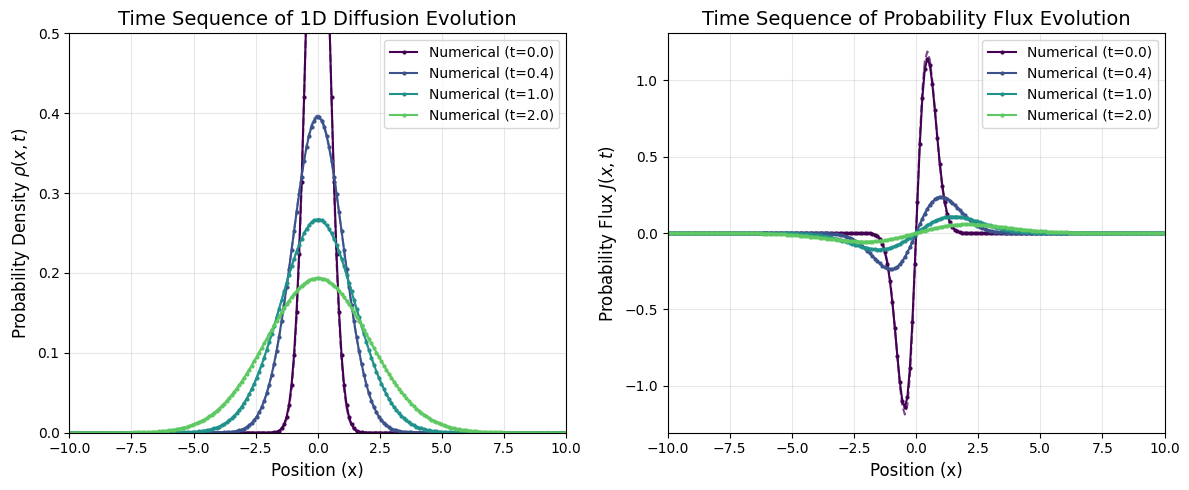

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1      # Diffusion coefficient
L = 100    # Length of the domain
dx = 1.0   # Spatial step
dt = 0.1   # Time step

# Stability condition: alpha = D * dt / dx^2 ≤ 0.5
assert D * dt / dx**2 <= 0.5, "Choose a smaller dt or larger dx for numerical stability."

num_steps = 500  # Total time steps for simulation
time_steps = [0, 100, 250, 500]  # Selected time steps for snapshots

# Initialize grid with an initial delta function at the center
x = np.arange(0, L, dx)
rho = np.zeros_like(x)
rho[L//2] = 1.0 / dx  # Initial peak

# Finite difference loop (explicit scheme)
snapshots = {}
for step in range(num_steps + 1):

    rho_new = rho.copy()

    # Notice that we are excluding boundaries, e.g indieces run from [1 to N-2] excluding 0 and N-1 boundaries of N sized rho
    rho_new[1:-1] = rho[1:-1] + D * dt / dx**2 * ( rho[:-2] - 2 * rho[1:-1] + rho[2:] )
    
    rho = rho_new

    if step in time_steps:
        snapshots[step] = rho.copy()

# Plot snapshots
fig, axes = plt.subplots(1, len(time_steps), figsize=(15, 5))

for ax, step in zip(axes, time_steps):
    ax.plot(x, snapshots[step], label=f't = {step * dt:.1f}')
    ax.set_ylim(0, 1.1 * np.max(rho))
    ax.set_title(f"t = {step * dt:.1f}")
    ax.set_xlabel("x")
    ax.set_ylabel("Probability Density $\\rho(x, t)$")

plt.suptitle("Time Evolution of 1D Diffusion", fontsize=14)
plt.legend()
plt.show()

:::{admonition} **Numerical Solution of 2D diffusion equation using the finite difference method**
:class: dropdown, tip

- The probability density $\rho(x,y,t)$ is initialized as a **delta function** at the center.
- We use an **explicit finite difference scheme**, just like we did for 1D solution. Here we have grid indexed with $i$ and $j$ for each point

$$
  \rho_{i,j}^{t+dt} = \rho_{i,j}^t + \alpha \left( \rho_{i+1,j} + \rho_{i-1,j} + \rho_{i,j+1} + \rho_{i,j-1} - 4\rho_{i,j} \right)
$$

- Once again we must take care and choose time-step to satisfy **numerical stability condition** $\alpha = \frac{D \Delta t}{\Delta x^2} \leq \frac{1}{2}$.

- The final heatmap visualization shows the **spread of the probability distribution** over time due to diffusion. 

:::

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
D = 1  # Diffusion coefficient
L = 20  # Grid size (L x L)
dx = 1.0  # Grid spacing
dt = 0.1  # Time step

# Stability condition for explicit diffusion scheme: alpha = D * dt / dx^2 ≤ 0.25 (for 2D case)
assert D * dt / dx**2 <= 0.25, "Choose a smaller dt or larger dx for numerical stability."

num_steps = 500  # Total time steps for simulation
time_steps = [0, 100, 250, 500]  # Selected time steps for snapshots

# Initialize grid with an initial delta function at the center
rho = np.zeros((L, L))
rho[L//2, L//2] = 1.0 / (dx**2)  # Initial peak

# Finite difference loop (explicit scheme) with snapshots
snapshots = {}
for step in range(num_steps + 1):
    rho_new = rho.copy()
    rho_new[1:-1, 1:-1] = rho[1:-1, 1:-1] + D * dt / dx**2 * (
        rho[:-2, 1:-1] + rho[2:, 1:-1] + rho[1:-1, :-2] + rho[1:-1, 2:] - 4 * rho[1:-1, 1:-1]
    )
    rho = rho_new

    if step in time_steps:
        snapshots[step] = rho.copy()

# Plot snapshots
fig, axes = plt.subplots(1, len(time_steps), figsize=(15, 5))
for ax, step in zip(axes, time_steps):
    im = ax.imshow(snapshots[step], extent=[-L//2, L//2, -L//2, L//2], cmap="hot", origin="lower")
    ax.set_title(f"t = {step * dt:.1f}")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

# Add colorbar
fig.colorbar(im, ax=axes.ravel().tolist(), label="Probability Density $\\rho(x, y, t)$")
plt.suptitle("Time Evolution of 2D Diffusion", fontsize=14)
plt.show()

### Micro, Meso, and Macro Scales

#### Interpretation of Time Scales 

- **Microscopic:** $t = n \delta t$ represents individual random jumps with **binomially distributed** steps.
- **Mesoscopic:** $t$ aggregates many microscopic steps, leading to a **normal distribution**.
- **Macroscopic:** $t$ is a **continuous time variable**, where diffusion follows a **Gaussian probability density**

#### Microscopic: Random Walk

- At the microscopic scale, diffusion is modeled as a **stochastic process** where particles undergo random displacements at discrete time steps $\delta t$ for an observation period $t=n\delta t$

- Displacements are sampled from single step **binomial random variable** generating e.g $+1$ or $-1$ with equal probabilities:

$$
X_i \sim \mathcal{B}(-1\,\,or\,+1)
$$

$$
X(t) = X_1+X_2 + ... X_n
$$

- **For large $n$**, according to Central limit theorem the displacements is well **approximated as Gaussian**

  $$
  P(x, t) \approx \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{x^2}{4 D t}},
  $$
  
where the diffusion coefficient is $D = \frac{\langle \delta x^2 \rangle}{2\delta t} $.

#### Mesoscopic: Einstein’s Relation and Brownian Motion

- At the mesoscopic level, diffusion results from numerous collisions occurring on a time scale of $\delta t$, leading to observable random displacements over a **coarse-grained time** $t$.

- The displacement of a Brownian particle follows a **normal distribution**:

  $$
  x(t) \sim \mathcal{N}(0, 2Dt)
  $$

  $$
  P(x, t) = \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{x^2}{4 D t}}.
  $$

#### Macroscopic: Fick’s Law and Continuum Description

- At the macroscopic level, diffusion is governed by **Fick’s laws**, treating concentration as a continuous field:

  $$
  \frac{\partial P}{\partial t} = D \nabla^2 P.
  $$

- The probability distribution satisfies the **diffusion equation solution**:

  $$
  P(x, t) = \frac{1}{\sqrt{4 \pi D t}} e^{-\frac{x^2}{4 D t}},
  $$

  which is the same Gaussian form as the mesoscopic level, indicating a smooth deterministic evolution at large scales.





### References

**The mighty little books**
-  ["Random Walks in Biology",  H Berg (1993)](https://www.amazon.com/Random-Walks-Biology-Howard-Berg/dp/0691000646)
-  ["Physical models of Living systems",  P Nelson (2015)](https://www.amazon.com/gp/product/1464140294/ref=ppx_yo_dt_b_search_asin_title?ie=UTF8&psc=1)

**More in depth**
 - ["Simple Brownian Diffusion: An Introduction to the Standard Theoretical Models", D Gillespie](https://www.amazon.com/Simple-Brownian-Diffusion-Introduction-Theoretical/dp/0199664501/ref=sr_1_1?keywords=diffusion+brownian&qid=1579882520&sr=8-1)
 - ["Stochastic Processes for Physicists" K Jacobs](https://www.amazon.com/Stochastic-Processes-Physicists-Understanding-Systems/dp/0521765420/ref=sr_1_1?keywords=kurt+jacobs+stochastic&qid=1579882738&sr=8-1)